# PyTorch Computer Vision

#Architecture of a CNN

1. Input Image
2. Input layer
3. Convolution layer
4. Hidden activation/non-linear activation
5. Pooling layer
6. Output layer/linear layer
7. Output activation

## 0. Computer Vision Libraries in PyTorch

* [`torchvision`]
* `torchvision.datasets` - get datasets and data loading functions
* `torchvision.models` - get pretrained computer vision models
* `torchvision.transforms` - functions for manipulating your vision data to be suitable for an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets,transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

torch.__version__,torchvision.__version__

('2.0.1+cu118', '0.15.2+cu118')

## 1. Getting a dataset

Fashion MNIST

In [ ]:
train_data = datasets.FashionMNIST(
    root="data", # where to download
    train=True, # do we need training set
    download=True, # do we need to download it
    transform=torchvision.transforms.ToTensor(), # how do we have to transform data
    target_transform=None # how do we have to transform the test data
    )

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

### 1.1 Analysing the data

In [ ]:
len(train_data)

60000

In [ ]:
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.classes[label]

'Ankle boot'

### 1.2 Visualising the data

Image shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

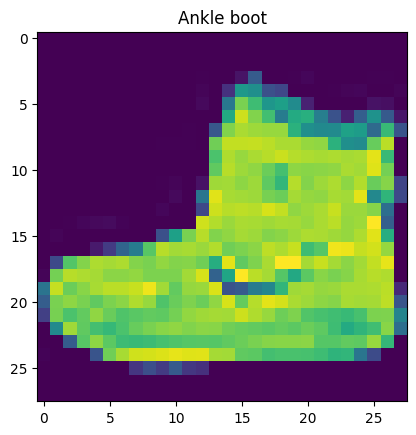

In [ ]:
import matplotlib.pyplot as plt
image,label = train_data[0]
print(f"Image shape : {image.shape}")
plt.imshow(image.permute(1,2,0))
plt.title(train_data.classes[label])

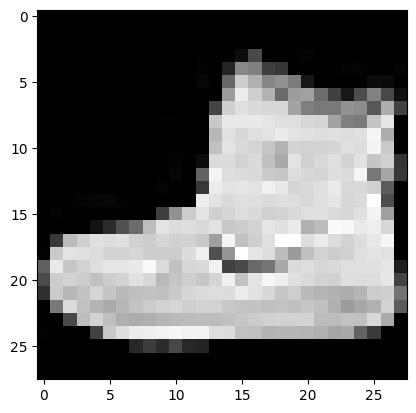

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")

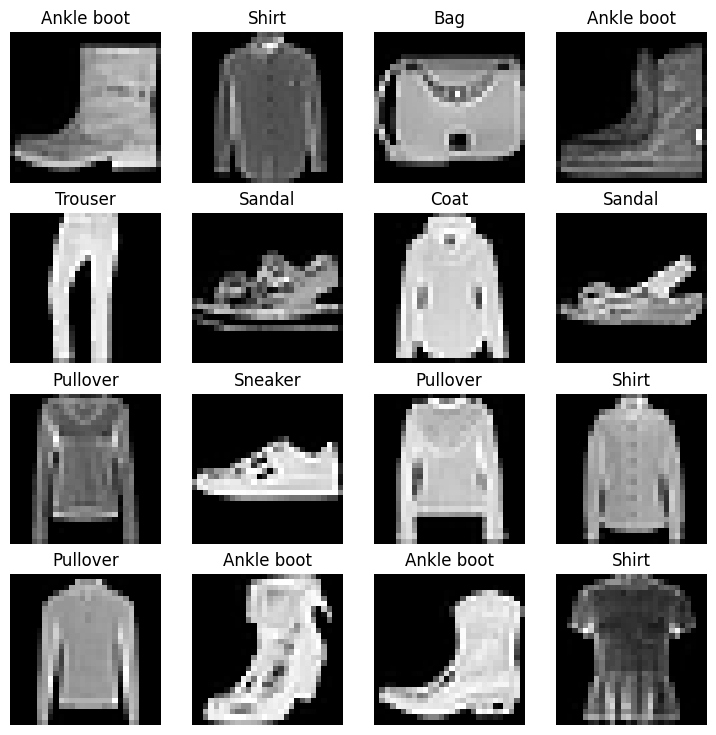

In [ ]:
# Plot more images
torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img,label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(train_data.classes[label])
  plt.axis(False)

In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

from numpy import iterable
## 2. Prepare DataLoader

Right now, data is in the form of a dataset

DataLoader turns our Dataset into python iterable

We want to turn our data in form of batches

We do this becoz:
1. It is more computationally efficient
2. It gives our neural network more chances to update its gradients per epoch

In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fcf8dc9d4e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fcf8dc9ffd0>)

In [ ]:
len(train_dataloader)

1875

In [ ]:
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Text(0.5, 1.0, 'Shirt')

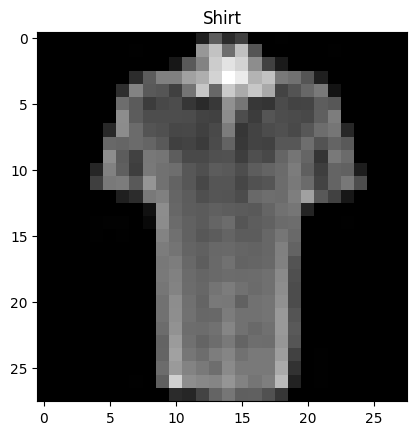

In [ ]:
torch.manual_seed(42)

random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img,lbl = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(train_data.classes[label])

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words, start simply and add complexity when necessary.

In [ ]:
# Creating a flatten layer
flatten_model = nn.Flatten()

#Get a single sample
x = train_features_batch[0]

#flatten the sample
output = flatten_model(x)

x.shape,output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [ ]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )

  def forward(self,x:torch.Tensor):
      return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(train_data.classes)
    ).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1 Setup loss function, optimizer and evaluation metrics

* Loss Function - `nn.CrossEntropyLoss`
* Optimizer - SGD
* Evaluation Metric - Accuracy

In [ ]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  return (correct/len(y_pred))*100

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

### 3.2 Creating a function to time our experiments

Two of the main things we'll need to track are:
1. Model's performance (loss and accuracy)
2. How fast it runs

In [ ]:
from timeit import default_timer

def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  total_time = end - start
  print(f"Total time on {device}:{total_time:.3f} seconds")

### 3.3 Creating a training loop and training on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out what's happening
5. Time it

In [ ]:
#tqdm for progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = default_timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")

  train_loss = 0
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(X)

    loss = loss_fn(y_pred,y)
    train_loss += loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400==0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")
  train_loss /= len(train_dataloader)

  ## Testing
  test_loss,test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred,y_test)
      test_acc += accuracy_fn(y_test,test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%")
train_time_end_on_cpu = default_timer()
total_train_time_model_0 = print_train_time(train_time_start_on_cpu,train_time_end_on_cpu,str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test Loss: 0.5095 | Test acc: 82.04%
Epoch: 1
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test Loss: 0.4799 | Test acc: 83.20%
Epoch: 2
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test Loss: 0.4766 | Test acc: 83.43%
Total time on cpu:43.176 seconds


## 4. Make predictions and get Model_0 results

In [ ]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in dataloader:
      y_pred = model(X)
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y,y_pred.argmax(dim=1))

    loss /= len(dataloader)
    acc /= len(dataloader)
  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}

model_0_results = eval_model(model_0,test_dataloader,loss_fn,accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic code

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non linearity

In [ ]:
from torch import nn
class FashionMNISTModelV1(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )
  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(784,10,len(train_data.classes)).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

### 6.1 Setup loss function,accuracy function and optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  return (correct/len(y_pred))*100

### 6.2 Build the training loop

In [ ]:
from timeit import default_timer
from tqdm.auto import tqdm

In [ ]:
def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
  train_loss,train_acc = 0,0
  for batch,(X,y) in enumerate(dataloader):
    X,y = X.to(device),y.to(device)
    model.train()
    y_pred = model(X)
    loss = loss_fn(y_pred,y)
    train_loss+=loss
    train_acc += accuracy_fn(y,y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):
  test_loss,test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for (X,y) in dataloader:
      X,y = X.to(device),y.to(device)
      y_pred = model(X)
      test_loss += loss_fn(y_pred,y)
      test_acc += accuracy_fn(y,y_pred.argmax(dim=1))
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
  print(f"Test loss:{test_loss:.5f} | Test acc:{test_acc:.2f}%\n")

In [ ]:
from tqdm.auto import tqdm
from timeit import default_timer
torch.manual_seed(42)

epochs = 3

timer_start_on_gpu = default_timer()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model=model_1,
             dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
timer_end_on_gpu = default_timer()
print_train_time(timer_start_on_gpu,timer_end_on_gpu,device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train acc: 61.34%
Test loss:0.95636 | Test acc:65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train acc: 71.93%
Test loss:0.72227 | Test acc:73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train acc: 75.94%
Test loss:0.68500 | Test acc:75.02%

Total time on cuda:36.754 seconds


In [ ]:
def eval_model(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device:torch.device=device):
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in dataloader:
      X,y = X.to(device),y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y,y_pred.argmax(dim=1))

    loss /= len(dataloader)
    acc /= len(dataloader)
  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}
model_1_results = eval_model(model=model_1,
                             dataloader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Model 2: Building a Convolutional Neural Network(CNN)

Also known as ConvNets

Known for their capabilities to find patterns in visual data.

Resource:
* https://poloclub.github.io/cnn-explainer/

In [ ]:
# Create a CNN
class FashionMNISTModelV2(nn.Module):
  '''Replicates TinyVGG from CNN explainer'''
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self,x:torch.Tensor):
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [ ]:
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(train_data.classes)).to(device)
model_2(image.unsqueeze(dim=0).to(device)).shape

torch.Size([1, 10])

### 7.1 Stepping through `nn.Conv2d()`

In [ ]:
torch.manual_seed(42)

images = torch.randn(size=(32,3,64,64))
test_image = images[0]
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)
result = conv_layer(test_image.unsqueeze(dim=0))
result

tensor([[[[-2.8778e-01, -6.0596e-02, -5.6306e-02,  ...,  2.8654e-01,
            6.6224e-01, -2.3216e-01],
          [-9.8911e-01, -4.0099e-01,  4.1832e-01,  ...,  4.7459e-01,
           -1.8552e-01, -5.7622e-01],
          [-4.1340e-02, -2.3277e-01,  3.7418e-01,  ...,  2.8255e-02,
            1.4923e-01,  1.4236e-01],
          ...,
          [-8.0374e-01, -7.6687e-01, -5.9457e-02,  ...,  1.7452e-01,
            4.2594e-01, -4.8341e-01],
          [-1.4512e-01, -1.1566e-01,  6.1783e-01,  ...,  2.4126e-01,
           -3.6626e-01,  3.5645e-01],
          [ 3.6096e-02,  1.5214e-01,  2.3123e-01,  ...,  3.0904e-01,
           -4.9680e-01, -7.2258e-01]],

         [[-1.0853e+00, -1.6079e+00,  1.3346e-01,  ...,  2.1698e-01,
           -1.7643e+00,  2.5263e-01],
          [-8.2507e-01,  6.3866e-01,  1.8845e-01,  ..., -1.0936e-01,
            4.8068e-01,  8.4869e-01],
          [ 6.4927e-01, -4.2061e-03, -4.9991e-01,  ...,  5.8356e-01,
            2.4611e-01,  6.6233e-01],
          ...,
     

In [ ]:
result.shape

torch.Size([1, 10, 62, 62])

### 7.2 Stepping through `nn.MaxPool2d()`

In [ ]:
maxpool_layer = nn.MaxPool2d(kernel_size=2)
res = maxpool_layer(result)
res.shape

torch.Size([1, 10, 31, 31])

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(train_data.classes)).to(device)

### 7.3 Setup loss function,accuracy function and optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [ ]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  return (correct/len(y_pred))*100

### 7.4 Training and Testing

In [ ]:
from tqdm.auto import tqdm
from timeit import default_timer
torch.manual_seed(42)

epochs = 3
timer_start = default_timer()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model=model_2,
             dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
timer_end = default_timer()
print_train_time(timer_start,timer_end,device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59607 | Train acc: 78.39%
Test loss:0.41905 | Test acc:85.18%

Epoch: 1
---------
Train loss: 0.36357 | Train acc: 86.93%
Test loss:0.35069 | Test acc:87.05%

Epoch: 2
---------
Train loss: 0.32621 | Train acc: 88.14%
Test loss:0.33062 | Test acc:87.99%

Total time on cuda:42.162 seconds


In [ ]:
model_2_results = eval_model(model=model_2,
                             dataloader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3306172788143158,
 'model_acc': 87.98921725239616}

## 8. Comparing model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.330617,87.989217


Text(0, 0.5, 'Model')

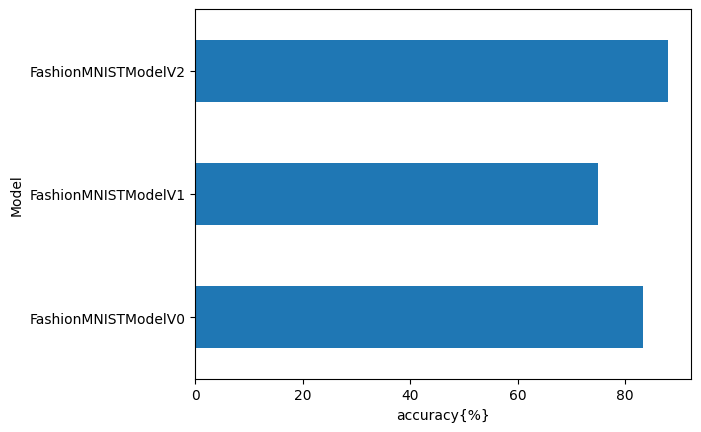

In [ ]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy{%}")
plt.ylabel("Model")

In [ ]:
from pathlib import Path

MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_TRUE_PATH = MODEL_PATH / "ConvModel.pth"
torch.save(obj=model_2.state_dict(),
           f=MODEL_TRUE_PATH)

## 9. Make and evaluate random prediction with best model

In [ ]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample,dim=0).to(device)
      pred_logits = model(sample)
      pred_prob = torch.softmax(pred_logits.squeeze(),dim=0)
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)


In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)
pred_probs = make_predictions(model_2,test_samples,device)
pred_probs,test_samples[0].shape

(tensor([[7.9823e-01, 1.6764e-05, 6.2694e-04, 1.3228e-03, 5.2214e-04, 5.8402e-07,
          1.9872e-01, 3.3688e-06, 5.6192e-04, 2.0476e-07],
         [1.5522e-02, 8.7802e-01, 1.5730e-03, 5.8711e-02, 2.6358e-02, 6.7457e-06,
          1.9587e-02, 1.3752e-05, 1.9333e-04, 1.8854e-05],
         [1.0674e-05, 5.7600e-07, 5.8052e-05, 3.7551e-05, 6.4225e-04, 2.9162e-04,
          1.8867e-05, 2.6551e-04, 9.9867e-01, 3.3410e-06],
         [5.8608e-02, 1.1041e-03, 1.8218e-03, 2.4200e-01, 6.7860e-01, 3.3174e-06,
          5.3532e-03, 6.6827e-04, 1.1843e-02, 3.2881e-06],
         [2.3043e-05, 7.6338e-08, 4.6226e-07, 5.6499e-08, 1.2229e-07, 9.9967e-01,
          4.1631e-07, 9.5683e-05, 2.0214e-04, 1.1565e-05],
         [1.8702e-02, 1.1434e-04, 7.9611e-01, 6.9942e-04, 5.6837e-03, 1.9684e-05,
          1.7824e-01, 8.2146e-06, 4.0285e-04, 1.0243e-05],
         [8.1729e-07, 9.9998e-01, 2.1640e-09, 1.5405e-05, 7.8033e-06, 3.0183e-08,
          1.1532e-07, 1.8561e-08, 1.1181e-07, 2.1292e-09],
         [2.9

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([0, 1, 8, 4, 5, 2, 1, 8, 0])

In [ ]:
test_labels

[0, 1, 8, 4, 5, 2, 1, 8, 0]

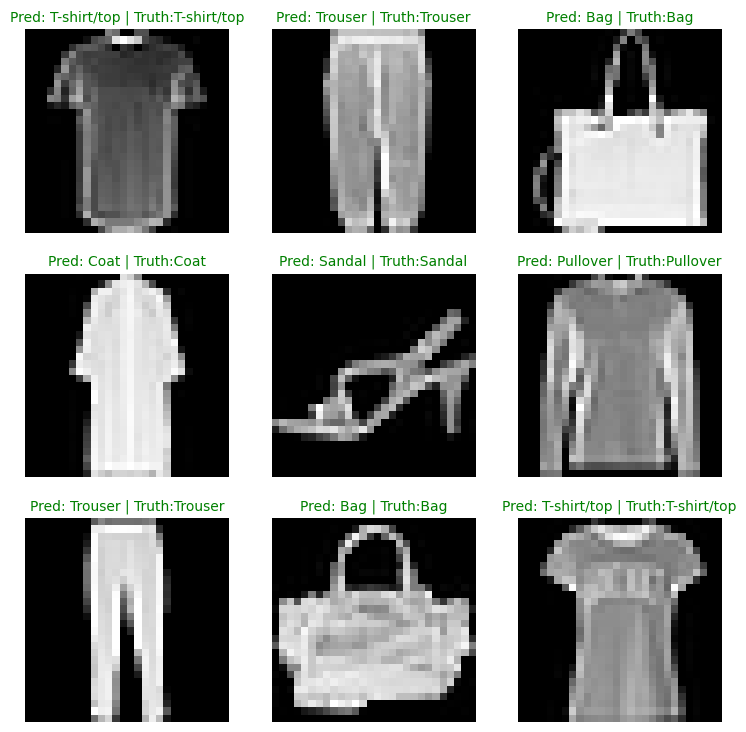

In [ ]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(sample.squeeze(),cmap="gray")
  pred_label = test_data.classes[pred_classes[i]]
  true_label = test_data.classes[test_labels[i]]
  title_text = f"Pred: {pred_label} | Truth:{true_label}"
  if pred_label==true_label:
    plt.title(title_text,fontsize=10,c="g")
  else:
    plt.title(title_text,fontsize=10,c="r")
  plt.axis(False)

## 10. Making a confusion matrix for further evaluation

1. Make predictions Make predictions with our trained model
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlextend.plotting.plot_confusion_matrix()`

In [ ]:
from tqdm.auto import tqdm

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="Making predictions..."):
    # Send data to device
    X,y = X.to(device),y.to(device)
    # Forward pass
    y_logit = model_2(X)
    # logit -> prediction probs -> pred labels
    y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

#print(y_preds)
y_preds_tensor = torch.cat(y_preds)
y_preds_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 2])

In [ ]:
# install reqd libs
try:
  import torchmetrics,mlxtend
  print(f"mlxtend version:{mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1])>=19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics,mlxtend
  print(f"mlxtend version:{mlxtend.__version__}")

mlxtend version:0.22.0


In [ ]:
import mlxtend

In [ ]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass",num_classes=len(test_data.classes))
confmat_tensor = confmat(preds=y_preds_tensor,
                         target=test_data.targets)
confmat_tensor

tensor([[593,   5,  41,  76,  14,   1, 262,   0,   8,   0],
        [  8, 855,  10,  98,  23,   0,   4,   0,   1,   1],
        [  6,   2, 822,   9,  95,   0,  60,   0,   6,   0],
        [ 15,  11,  31, 860,  43,   0,  33,   0,   6,   1],
        [  2,   7, 127,  40, 751,   0,  67,   0,   6,   0],
        [  7,   1,   5,  13,   1, 842,   5,  53,  49,  24],
        [ 59,   6, 132,  64, 112,   0, 616,   0,  11,   0],
        [  1,   0,   0,   0,   0,  25,   0, 912,   4,  58],
        [ 11,   3,  36,  15,  12,   7,  34,   9, 872,   1],
        [  0,   0,   2,   3,   0,  21,   2,  82,   7, 883]])

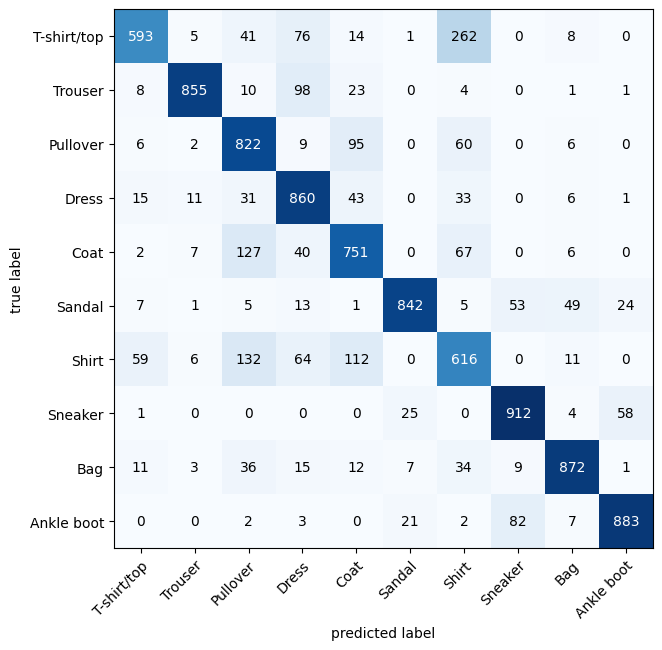

In [ ]:
fig,ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=test_data.classes,
    figsize=(10,7)
)

## 11. Save and Load

In [ ]:
from pathlib import Path

MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_TRUE_PATH = MODEL_PATH / "bestModel.pth"

torch.save(obj=model_2.state_dict(),
           f=MODEL_TRUE_PATH)

In [ ]:
FashionMNISTV2 = FashionMNISTModelV2(input_shape=1,
                                     output_shape=10,
                                     hidden_units=10)
FashionMNISTV2.load_state_dict(torch.load(f=MODEL_TRUE_PATH))

<All keys matched successfully>

In [ ]:
FashionMNISTV2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)